# Gradient Descent using AirBnB dataset

In [1]:
# Import packages
import numpy as np
import pandas as pd

In [2]:
#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

In [5]:
# read the data = df_LDF
data = pd.read_csv('/Users/patrickokwir/Desktop/Lighthouse-data-notes/Unit 6/Day_2/df_LDA.csv')

In [6]:
data

price  minimum_nights  number_of_reviews  reviews_per_month  \
0      5.010635        0.693147           2.302585           0.190620   
1      5.420535        0.693147           3.828641           0.322083   
2      5.017280        1.386294           0.009950           0.009950   
3      4.499810        0.693147           5.602119           1.729884   
4      4.394449        2.397895           2.302585           0.095310   
...         ...             ...                ...                ...   
48890  4.262680        1.098612           0.009950           0.009950   
48891  3.713572        1.609438           0.009950           0.009950   
48892  4.753590        2.397895           0.009950           0.009950   
48893  4.025352        0.693147           0.009950           0.009950   
48894  4.510860        2.079442           0.009950           0.009950   

       calculated_host_listings_count  availability_365      class  
0                            1.945910          5.902633     medium  
1                            1.098612          5.874931  expensive  
2                            0.693147          5.902633     medium  
3                            0.693147          5.273000     medium  
4                            0.693147          0.009950      cheap  
...                               ...               ...        ...  
48890                        1.098612          2.302585      cheap  
48891                        1.098612          3.610918      cheap  
48892                        0.693147          3.332205     medium  
48893                        1.945910          1.098612      cheap  
48894                        0.693147          3.178054     medium  

[48895 rows x 7 columns]

In [17]:
#rename availability_365 to avail
data.rename(columns={'availability_365':'avail'}, inplace=True)

In [18]:
# Lets work with avail and number of reviews
x = data['number_of_reviews']
y = data['avail']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] # add a column of ones to x

In [19]:
# Gradient Descent
alpha = 0.01 # learning rate or step size
iterations = 1000 # number of iterations
m = y.size # number of data points
np.random.seed(123) # set the seed
theta = np.random.rand(2) # pick some random values to start with

In [20]:
# Cost function that can be linked to sum of squared residuals
# Gradient descent is used to minimize the cost function
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

# pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

# Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 3.00, 0.72


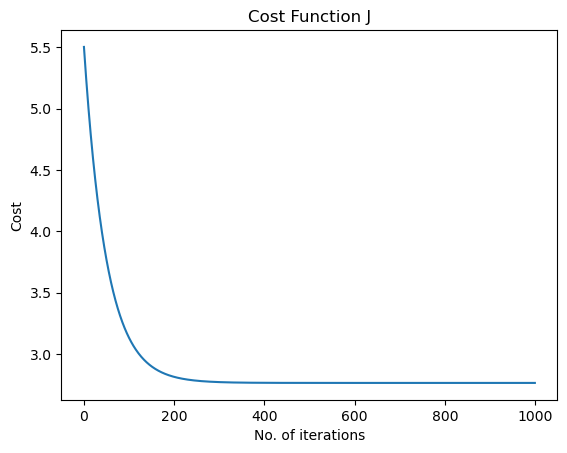

In [21]:
# Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

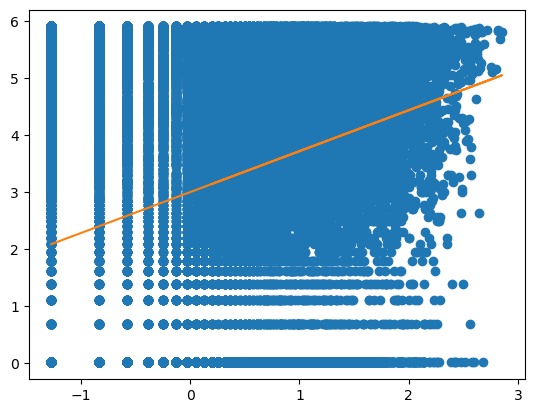

In [22]:
# Plot the line of best fit...
y_pred = theta[0] + theta[1]*x
plt.plot(x, y_pred)
plt.scatter(x[:,1], y)
plt.show()


In [24]:
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Availability vs Number of Reviews')
plt.xlabel('Number of reviews (standardized)')
plt.ylabel('Availability per year (standardized)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

# export of .gif
anim.save('animation.gif', writer='imagemagick', fps = 30)

MovieWriter imagemagick unavailable; using Pillow instead.



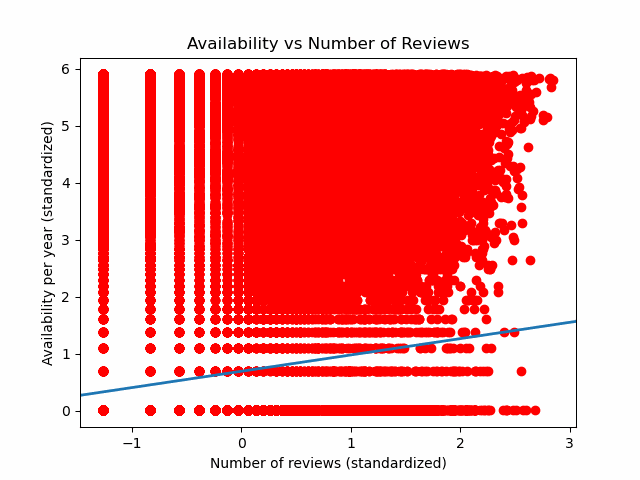

In [25]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))